#### Statistical analysis with Scipy, Statsmodel & Data Modelling with Sklearn

1. Correlation
2. Chi Square
3. Analysis of variance
4. Kruskal H walis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
HR_data = pd.read_csv('cleaned_data.csv')

1. Correlation

In [3]:
HR_data.describe()

,Unnamed: 0,BHK,Rent,Size,Bathroom,no_floor
count,4742.000000,4742.000000,4.742000e+03,4742.000000,4742.000000,4742.000000
mean,2370.500000,2.083720,3.500863e+04,967.669970,1.966048,6.973429
std,1369.041818,0.832245,7.813758e+04,634.355762,0.884555,9.469727
min,0.000000,1.000000,1.200000e+03,10.000000,1.000000,1.000000
25%,1185.250000,2.000000,1.000000e+04,550.000000,1.000000,2.000000
50%,2370.500000,2.000000,1.600000e+04,850.000000,2.000000,4.000000
75%,3555.750000,3.000000,3.300000e+04,1200.000000,2.000000,6.000000
max,4741.000000,6.000000,3.500000e+06,8000.000000,10.000000,89.000000


In [4]:
HR_data.columns

Index(['Unnamed: 0', 'Posted On', 'BHK', 'Rent', 'Size', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'house_floor', 'no_floor'],
      dtype='object')

Correlation checks how two values are related to one another and how they affect each other.

We are checking for the correlation how each of the factors affecting each other, in this case we are using BHK(the number of bathroom, hall and kitchen in the house), to check with the amount they are renting it out for and also the size of the house.

We are using 3 types of correlation which is the kendall,pearson and spearman

In [5]:
kendell_corr = HR_data[['BHK', 'Rent', 'Size']].corr('kendall')
pearson_corr = HR_data[['BHK', 'Rent', 'Size']].corr('pearson')
spearman_corr= HR_data[['BHK', 'Rent', 'Size']].corr('spearman')

kendell_corr
pearson_corr
spearman_corr

,BHK,Rent,Size
BHK,1.000000,0.568902,0.755251
Rent,0.568902,1.000000,0.521888
Size,0.755251,0.521888,1.000000


In [6]:
pearson_corr = HR_data[['BHK', 'Rent', 'Size']].corr('pearson')
pearson_corr

,BHK,Rent,Size
BHK,1.000000,0.369942,0.716257
Rent,0.369942,1.000000,0.413581
Size,0.716257,0.413581,1.000000


Explanation of the Table that it gave us
The values used are all continious variables,.... Read more for it

Text(0.5, 1.0, 'Spearman Rank Correlation')

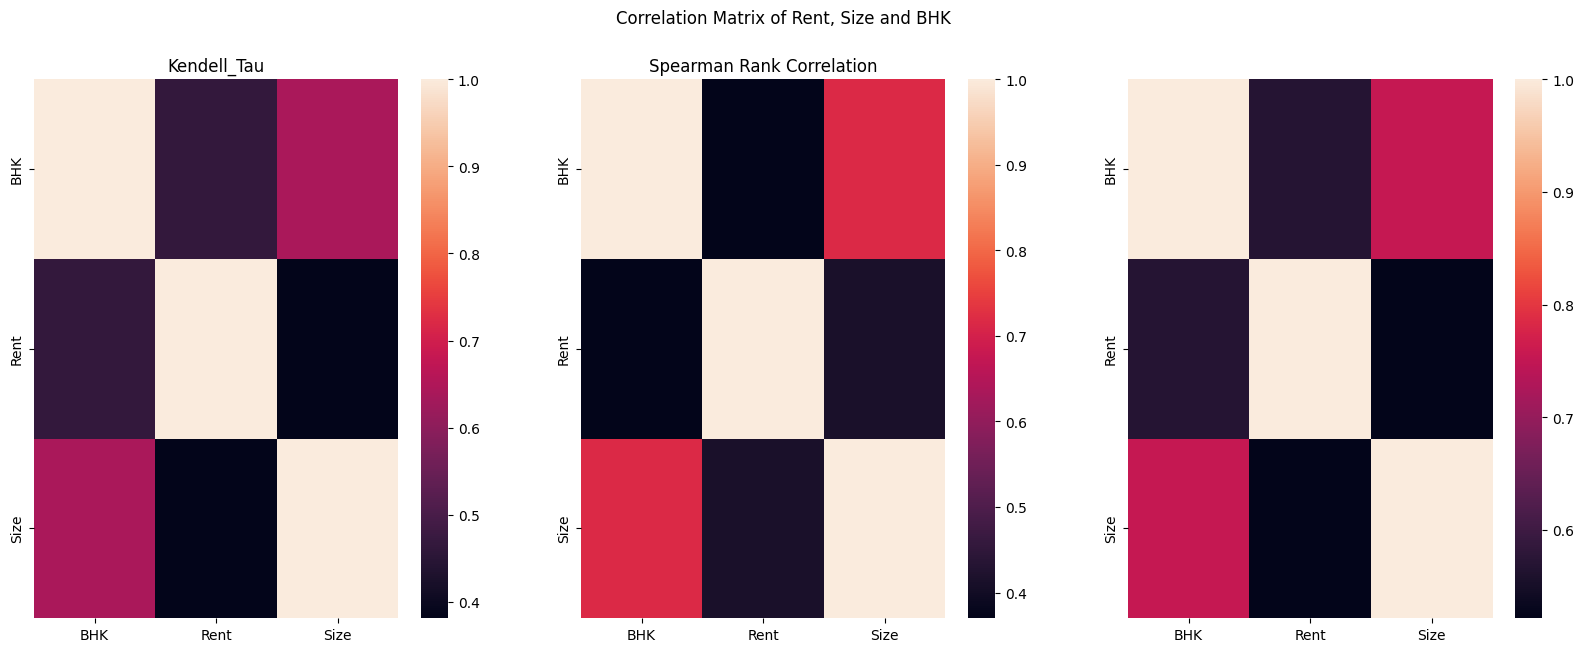

In [7]:
kendell_corr = HR_data[['BHK', 'Rent', 'Size']].corr('kendall')
pearson_corr = HR_data[['BHK', 'Rent', 'Size']].corr('pearson')
spearman_corr= HR_data[['BHK', 'Rent', 'Size']].corr('spearman')

fig, axes = plt.subplots(1, 3, figsize= (20,7))

sns.heatmap(data=kendell_corr, ax=axes[0])
sns.heatmap(data=pearson_corr, ax=axes[1])
sns.heatmap(data=spearman_corr, ax=axes[2])

plt.suptitle('Correlation Matrix of Rent, Size and BHK')

axes[0].set_title('Kendell_Tau')
axes[1].set_title('Pearson Product Moment')
axes[1].set_title('Spearman Rank Correlation')



Text(0.5, 1.0, 'Spearman Rank Correlation')

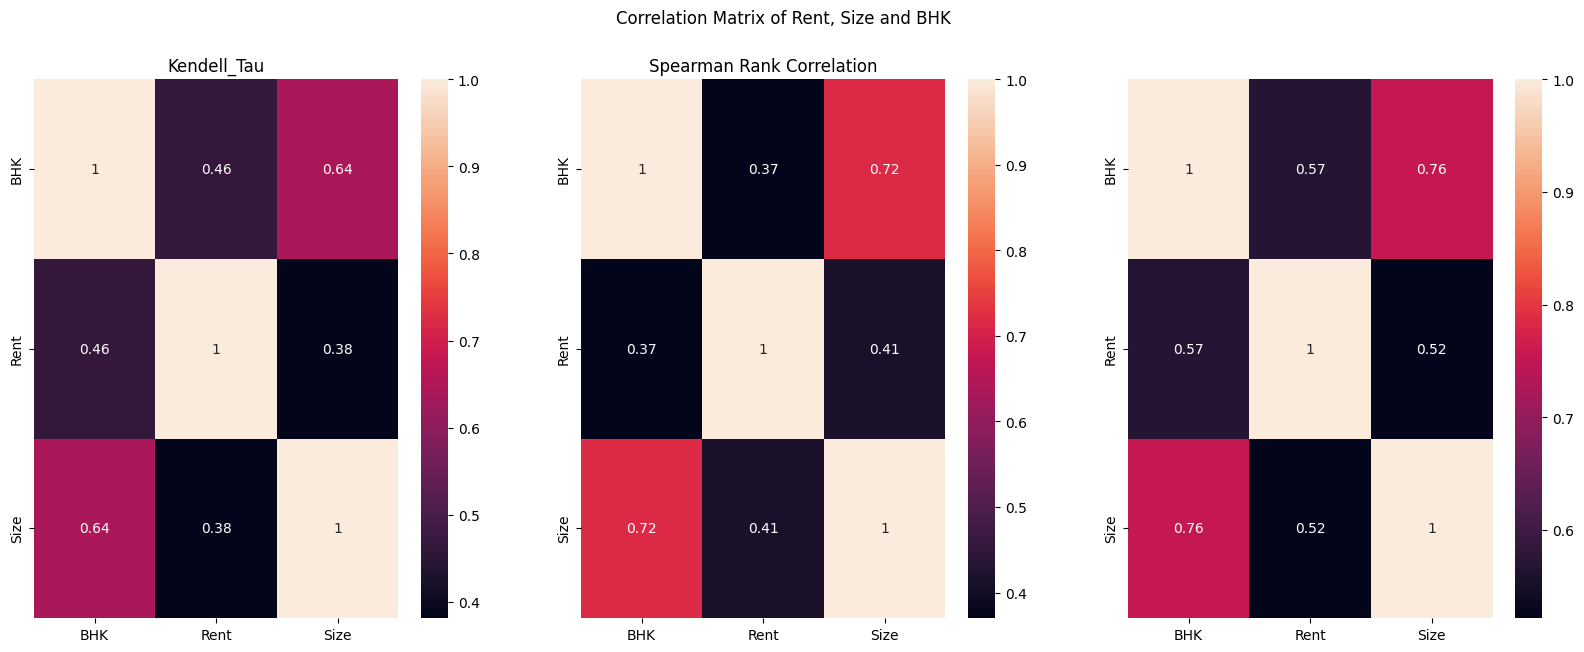

In [8]:
# Using the annot function brought out the number inn each of the boxes, 
# you can compare it to the one that does not have annote
kendell_corr = HR_data[['BHK', 'Rent', 'Size']].corr('kendall')
pearson_corr = HR_data[['BHK', 'Rent', 'Size']].corr('pearson')
spearman_corr= HR_data[['BHK', 'Rent', 'Size']].corr('spearman')

fig, axes = plt.subplots(1, 3, figsize= (20,7))

sns.heatmap(data=kendell_corr, ax=axes[0],annot=True)
sns.heatmap(data=pearson_corr, ax=axes[1],annot=True)
sns.heatmap(data=spearman_corr, ax=axes[2],annot=True)

plt.suptitle('Correlation Matrix of Rent, Size and BHK')

axes[0].set_title('Kendell_Tau')
axes[1].set_title('Pearson Product Moment')
axes[1].set_title('Spearman Rank Correlation')

Text(0.5, 1.0, 'Spearman Rank Correlation')

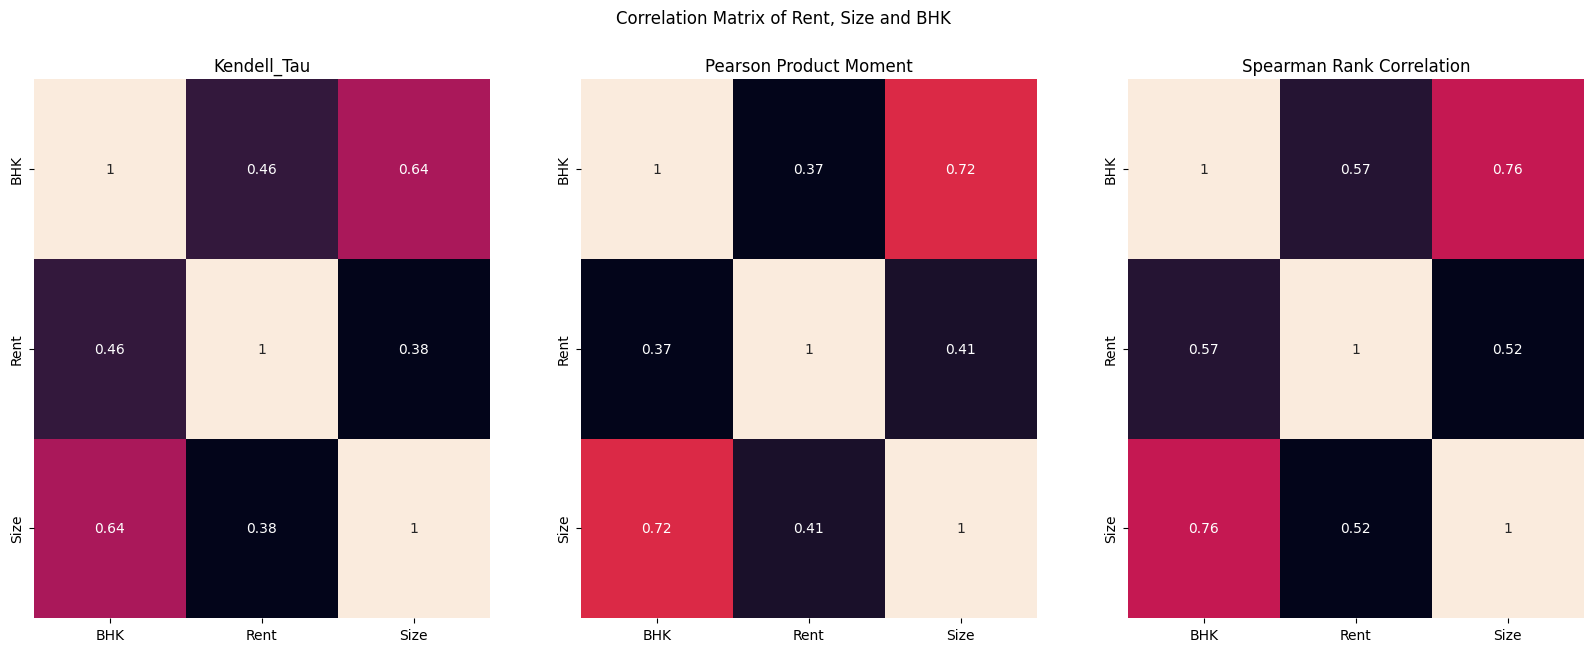

In [9]:

# This is to remove the bars between the graphs so that we can see the visualizations clearly
kendell_corr = HR_data[['BHK', 'Rent', 'Size']].corr('kendall')
pearson_corr = HR_data[['BHK', 'Rent', 'Size']].corr('pearson')
spearman_corr= HR_data[['BHK', 'Rent', 'Size']].corr('spearman')

fig, axes = plt.subplots(1, 3, figsize= (20,7))

sns.heatmap(data=kendell_corr, ax=axes[0],annot=True, cbar=False)
sns.heatmap(data=pearson_corr, ax=axes[1],annot=True, cbar=False)
sns.heatmap(data=spearman_corr, ax=axes[2],annot=True, cbar=False)

plt.suptitle('Correlation Matrix of Rent, Size and BHK')

axes[0].set_title('Kendell_Tau')
axes[1].set_title('Pearson Product Moment')
axes[2].set_title('Spearman Rank Correlation')

Insight


In [10]:
# Checking for significant diff in BHK... shapiro gives two output thats why we have the stats and pvalue
# you can decide to print anyone out of them... you can print either stats or pvalue
from scipy.stats import shapiro

Ho = 'There is normaity'    #There is no significant difference
H1 = 'There is no normaity'  #There is significant difference
# performing the shapiro wilk test
stats, p_value = shapiro(HR_data['BHK'].values)

if p_value < 0.05:
    print(f'{H1} in BHK')
else:
    print(f'{Ho} in BHK')

p_value
# stats


There is no normaity in BHK


np.float64(2.6568928755927767e-55)

In [11]:
# Checking for significant diff in RENT

Ho = 'There is normalty'    #There is no significant difference
H1 = 'There is no normalty'  #There is significant difference

stats, p_value = shapiro(HR_data['Rent'].values)

if p_value < 0.05:
    print(f'{H1} in Rent')
else:
    print(f'{Ho} in Rent')

p_value

There is no normaity in Rent


np.float64(1.6265682261755304e-86)

In [12]:
# Checking for significant diff in Size

Ho = 'There is normaity'    #There is no significant difference
H1 = 'There is no normaity'  #There is significant difference

stats, p_value = shapiro(HR_data['Size'].values)

if p_value < 0.05:
    print(f'{H1} in Size')
else:
    print(f'{Ho} in Size')

print(float(p_value))
print(float(stats))

There is no normaity in Size
5.376498206816902e-56
0.8436420656247993


In [13]:
Ho = 'There is normaity'    #There is no significant difference
H1 = 'There is no normaity'  #There is significant difference

stats, p_value = shapiro(HR_data['Rent'].values)

if p_value < 0.05:
    print(f'{H1} in Rent')
else:
    print(f'{Ho} in Rent')

print(float(p_value))


There is no normaity in Rent
1.6265682261755304e-86


In [14]:
# checking the correlation of the 3 samples together
Ho = 'There is normaity'    #There is no significant difference
H1 = 'There is no normaity'  #There is significant difference

col_test = {}

col_list = ['BHK','Rent','Size']

for col in col_list:
    stats, p_value = shapiro(HR_data[col].values)
    stats_list = [stats, p_value]
    col_test.update({col : stats_list})


for i, v in col_test.items():
    # print(i , v)

    if v[1] < 0.05:
        print(f'{H1} in {i} @p-value = {v[1]}')
    else:
        print(f'{Ho} in {i} @p-value = {v[1]}')


There is no normaity in BHK @p-value = 2.6568928755927767e-55
There is no normaity in Rent @p-value = 1.6265682261755304e-86
There is no normaity in Size @p-value = 5.376498206816902e-56


In [15]:
# checking the correlation of the 3 samples together   ... \n means to start the answer on a new line
Ho = 'There is normaity'    #There is no significant difference
H1 = 'There is no normaity'  #There is significant difference

col_test = {}

col_list = ['BHK','Rent','Size']

for col in col_list:
    stats, p_value = shapiro(HR_data[col].values)
    stats_list = [stats, p_value]
    col_test.update({col : stats_list})


for key, value in col_test.items():
    print(f'The key {key}\n', f'The value - {value}\n')

The key BHK
 The value - [np.float64(0.8495871682498453), np.float64(2.6568928755927767e-55)]

The key Rent
 The value - [np.float64(0.2916555911008233), np.float64(1.6265682261755304e-86)]

The key Size
 The value - [np.float64(0.8436420656247993), np.float64(5.376498206816902e-56)]



#### Analyis Day 2

In [16]:
# Testing the statistical significance of the spearman correlation
# 0.00 to 0.05 are statistically significant and its at 3 levels...0,1,5 anything higher than that is not 
# statistically significant.

from scipy.stats import spearmanr

Ho = 'There is normaity'    #There is no significant difference
H1 = 'There is no normaity'  #There is significant difference

bhk_rent = stats, p_value = spearmanr(HR_data['BHK'].values, HR_data['Rent'].values)
size_rent = stats, p_value = spearmanr(HR_data['Size'].values, HR_data['Rent'].values)
size_bhk = stats, p_value = spearmanr(HR_data['Size'].values, HR_data['BHK'].values)

test_pairs = {
    'BHK vs Rent':bhk_rent,
    'Size vs Rent': size_rent,
    'Size vs BHK':size_bhk
}

for k, v in test_pairs.items(): #when printing in a dictionary, k = key and v= value
    print(f'{k}, --- {v}') #stating a format for howit will print it out
    print(v[0], 'stat')
    print(v[1], 'p_value')
    print('') #this means to print an empty space before priniting the next item in the dictionary

    # print(f'{v}')

BHK vs Rent, --- SignificanceResult(statistic=np.float64(0.5689021288413385), pvalue=np.float64(0.0))
0.5689021288413385 stat
0.0 p_value

Size vs Rent, --- SignificanceResult(statistic=np.float64(0.5218875401606804), pvalue=np.float64(0.0))
0.5218875401606804 stat
0.0 p_value

Size vs BHK, --- SignificanceResult(statistic=np.float64(0.7552513805953374), pvalue=np.float64(0.0))
0.7552513805953374 stat
0.0 p_value



In [17]:
from scipy.stats import spearmanr

Ho = 'There is normalty'    #There is no significant difference
H1 = 'There is no normalty'  #There is significant difference

bhk_rent = stats, p_value = spearmanr(HR_data['BHK'].values, HR_data['Rent'].values)
size_rent = stats, p_value = spearmanr(HR_data['Size'].values, HR_data['Rent'].values)
size_bhk = stats, p_value = spearmanr(HR_data['Size'].values, HR_data['BHK'].values)

test_pairs = {
    'BHK vs Rent':bhk_rent,
    'Size vs Rent': size_rent,
    'Size vs BHK':size_bhk
}

for k, v in test_pairs.items(): #when printing in a dictionary, k = key and v= value
    # print(f'{k}, --- {v}') #stating a format for howit will print it out
    # print(v[0], 'stat')
    # print(v[1], 'p_value')
    # print('') #this means to print an empty space before priniting the next item in the dictionary
    if v[1] < 0.05:
        print(f'{H1} in {k} @ p_value = {v[1]} with coeff = {v[0]}')
    else:
        print(f'{Ho} in {k} @ p_value = {v[1]} with coeff = {v[0]}')


    # print(f'{v}')

# the coefficient in the result is the level of correlation between the two values 

There is no normalty in BHK vs Rent @ p_value = 0.0 with coeff = 0.5689021288413385
There is no normalty in Size vs Rent @ p_value = 0.0 with coeff = 0.5218875401606804
There is no normalty in Size vs BHK @ p_value = 0.0 with coeff = 0.7552513805953374


#### ANALYSIS OF VARIANCE (ANOVA)

In [19]:
# to print out the elements in a list

HR_data['City'].unique()



array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [21]:
from scipy.stats import f_oneway

Ho = 'There is normalty'    #There is no significant difference
H1 = 'There is no normalty'  #There is significant difference

stats, p_value = f_oneway(
    HR_data[HR_data['City'] == 'Kolkata']['Size'].values,
    HR_data[HR_data['City'] == 'Mumbai']['Size'].values,
    HR_data[HR_data['City'] == 'Bangalore']['Size'].values,
    HR_data[HR_data['City'] == 'Delhi']['Size'].values,
    HR_data[HR_data['City'] == 'Chennai']['Size'].values,
    HR_data[HR_data['City'] == 'Hyderabad']['Size'].values,
)

# print(f'stats - {stats} \np_value - {p_value}')

if p_value< 0.05:
    print(f'{H1} between sizes in each city @ p_value = {p_value}')
else:
    print(f'{Ho} between sizes in each city @ p_value = {p_value}')

# this is the analysis to check if the sizes in each city are similar to eachother

There is no normalty between sizes in each city @ p_value = 3.657459890419429e-45


In [23]:
from scipy.stats import f_oneway

Ho = 'There is normalty'    #There is no significant difference
H1 = 'There is no normalty'  #There is significant difference

stats, p_value = f_oneway(
    HR_data[HR_data['City'] == 'Kolkata']['Rent'].values,
    HR_data[HR_data['City'] == 'Mumbai']['Rent'].values,
    HR_data[HR_data['City'] == 'Bangalore']['Rent'].values,
    HR_data[HR_data['City'] == 'Delhi']['Rent'].values,
    HR_data[HR_data['City'] == 'Chennai']['Rent'].values,
    HR_data[HR_data['City'] == 'Hyderabad']['Rent'].values,
)

# print(f'stats - {stats} \np_value - {p_value}')

if p_value< 0.05:
    print(f'{H1} between the rent between the cities @ p_value = {p_value}')
else:
    print(f'{Ho} between rent between the cities @ p_value = {p_value}')

There is no normalty between the rent between the cities @ p_value = 1.7334420745338585e-117
